In [114]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression

### EDA

In [75]:
data = pd.read_excel("./Data/Dataset.xlsx")
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,0,9,None,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [76]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        1039 non-null   object 
 1   Gender                             1039 non-null   object 
 2   Age                                1039 non-null   int64  
 3   Married                            1039 non-null   object 
 4   Number of Dependents               1039 non-null   int64  
 5   City                               1039 non-null   object 
 6   Number of Referrals                1039 non-null   int64  
 7   Tenure in Months                   1039 non-null   int64  
 8   Offer                              1039 non-null   object 
 9   Phone Service                      1039 non-null   object 
 10  Avg Monthly Long Distance Charges  1039 non-null   float64
 11  Multiple Lines                     1039 non-null   objec

In [77]:
data.isnull().sum().sort_values(ascending=False)[:5]

Churn Reason        696
Churn Category      696
Monthly Charge        0
Streaming Movies      0
Streaming Music       0
dtype: int64

In [78]:
data['Customer Status'].value_counts()

Stayed     647
Churned    343
Joined      49
Name: Customer Status, dtype: int64

In [79]:
df = pd.get_dummies(data=data,columns=['Customer Status'],prefix="customer")
df.fillna(0,inplace=True)
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,customer_Churned,customer_Joined,customer_Stayed
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,...,593.30,0.00,0,381.51,974.81,0,0,0,0,1
1,0003-MKNFE,Male,46,No,0,Glendale,0,9,None,Yes,...,542.40,38.33,10,96.21,610.28,0,0,0,0,1
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,...,280.85,0.00,0,134.60,415.45,Competitor,Competitor had better devices,1,0,0
3,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,...,1237.85,0.00,0,361.66,1599.51,Dissatisfaction,Product dissatisfaction,1,0,0
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,...,267.40,0.00,0,22.14,289.54,Dissatisfaction,Network reliability,1,0,0


In [80]:
df['City'].nunique()

586

In [81]:
df['Offer'].value_counts()

None       554
Offer B    129
Offer E    117
Offer D     99
Offer A     76
Offer C     64
Name: Offer, dtype: int64

In [82]:
df.groupby('Number of Dependents').sum()[['customer_Churned','customer_Stayed','customer_Joined']]

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_25224/1390791486.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Number of Dependents').sum()[['customer_Churned','customer_Stayed','customer_Joined']]


,customer_Churned,customer_Stayed,customer_Joined
Number of Dependents,,,
0,325,476,39
1,5,60,4
2,7,55,3
3,6,54,3
6,0,2,0


In [83]:
df['Offer'] = df['Offer'].apply(lambda x :  x[-1] if x[0]=='O' else x)

In [84]:
df['Offer'].value_counts()

None    554
B       129
E       117
D        99
A        76
C        64
Name: Offer, dtype: int64

In [85]:
df.groupby('Offer').sum()[['customer_Churned','customer_Stayed','customer_Joined']]

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_25224/761958020.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Offer').sum()[['customer_Churned','customer_Stayed','customer_Joined']]


,customer_Churned,customer_Stayed,customer_Joined
Offer,,,
A,10,66,0
B,11,118,0
C,11,53,0
D,41,58,0
E,72,26,19
None,198,326,30


In [86]:
df['Phone Service'].value_counts()

Yes    1039
Name: Phone Service, dtype: int64

### Encoding object columns

In [87]:
object_cols = [ col for col in df.columns if df[col].dtype=='O']
for col in object_cols:
    num_unique = df[col].nunique()
    print(col,"-",num_unique)

Customer ID - 1039
Gender - 2
Married - 2
City - 586
Offer - 6
Phone Service - 1
Multiple Lines - 2
Internet Service - 1
Internet Type - 3
Online Security - 2
Online Backup - 2
Device Protection Plan - 2
Premium Tech Support - 2
Streaming TV - 2
Streaming Movies - 2
Streaming Music - 2
Unlimited Data - 2
Contract - 3
Paperless Billing - 2
Payment Method - 3
Churn Category - 6
Churn Reason - 21


In [88]:
cols_to_drop = ['Customer ID','City','Churn Category','Churn Reason','Phone Service','customer_Joined','customer_Stayed']

In [89]:
should_encode = []
for col in object_cols:
    if (col not in cols_to_drop):
        should_encode.append(col)
should_encode

['Gender',
 'Married',
 'Offer',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [122]:
len(should_encode)

17

In [90]:
enc_df = pd.get_dummies(data=df.drop(cols_to_drop,axis=1),columns=should_encode,drop_first=True)
enc_df.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,42.39,16,65.6,593.30,0.00,0,...,1,1,0,0,1,1,0,1,1,0
1,46,0,0,9,10.69,10,-4.0,542.40,38.33,10,...,0,0,1,1,0,0,0,0,1,0
2,50,0,0,4,33.65,30,73.9,280.85,0.00,0,...,0,0,0,0,1,0,0,1,0,0
3,78,0,1,13,27.82,4,98.0,1237.85,0.00,0,...,0,1,1,0,1,0,0,1,0,0
4,75,0,3,3,7.38,11,83.9,267.40,0.00,0,...,1,1,0,0,1,0,0,1,1,0


In [91]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1039 non-null   int64  
 1   Number of Dependents               1039 non-null   int64  
 2   Number of Referrals                1039 non-null   int64  
 3   Tenure in Months                   1039 non-null   int64  
 4   Avg Monthly Long Distance Charges  1039 non-null   float64
 5   Avg Monthly GB Download            1039 non-null   int64  
 6   Monthly Charge                     1039 non-null   float64
 7   Total Charges                      1039 non-null   float64
 8   Total Refunds                      1039 non-null   float64
 9   Total Extra Data Charges           1039 non-null   int64  
 10  Total Long Distance Charges        1039 non-null   float64
 11  Total Revenue                      1039 non-null   float

### Scaling, Train-Test Split

In [92]:
y = enc_df['customer_Churned']
X = enc_df.drop('customer_Churned', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [93]:
y_train.value_counts()

0    487
1    240
Name: customer_Churned, dtype: int64

In [94]:
y_test.value_counts()

0    209
1    103
Name: customer_Churned, dtype: int64

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Classification Models

### Support Vector Machine

In [95]:
# Training an SVM classifier
svm = SVC(kernel= 'linear', class_weight = 'balanced', random_state = 42, C = 0.4, verbose = True)
svm.fit(X_train_std, y_train)
 
# Model performance
y_pred_svc = svm.predict(X_test_std)
print('\nRecall: %.3f' % recall_score(y_test, y_pred_svc))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_svc))

[LibSVM].........*...........*
optimization finished, #iter = 14841
obj = -120.502170, rho = -0.725985
nSV = 325, nBSV = 218
Total nSV = 325

Recall: 0.874
Accuracy: 0.724


In [96]:
# Recall of 1 needs to be good
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       209
           1       0.55      0.87      0.68       103

    accuracy                           0.72       312
   macro avg       0.73      0.76      0.72       312
weighted avg       0.79      0.72      0.73       312

[[136  73]
 [ 13  90]]


In [124]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred_svc).ravel()
tn, fp, fn, tp

(136, 73, 13, 90)

### Feature importance

In [97]:
feat_imp = pd.DataFrame()
feat_imp['Importance'] = pd.Series((svm.coef_[0]))
feat_imp['Column'] = X.columns

In [98]:
feat_imp.sort_values('Importance').head(10)

,Importance,Column
2,-1.288128,Number of Referrals
31,-0.778264,Contract_Two Year
3,-0.615861,Tenure in Months
1,-0.519206,Number of Dependents
14,-0.511349,Offer_B
15,-0.390523,Offer_C
18,-0.293601,Offer_None
30,-0.276412,Contract_One Year
27,-0.216219,Streaming Movies_Yes
26,-0.173347,Streaming TV_Yes


In [99]:
feat_imp.sort_values('Importance').tail(5)

,Importance,Column
0,0.131245,Age
10,0.188244,Total Long Distance Charges
28,0.292645,Streaming Music_Yes
6,0.323974,Monthly Charge
13,0.528258,Married_Yes


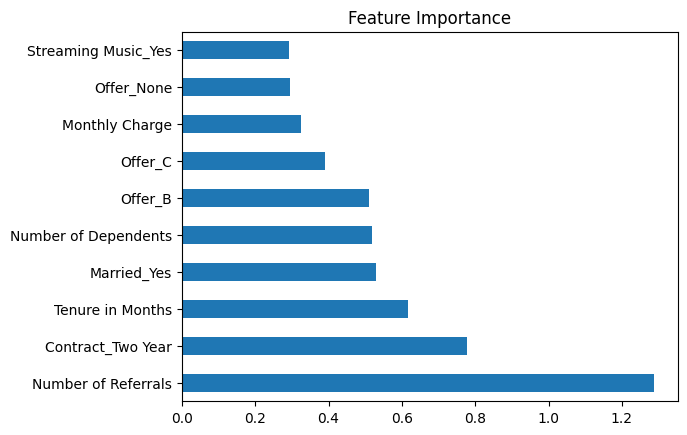

In [100]:
pd.Series(abs(svm.coef_[0]), index = X.columns).nlargest(10).plot(kind = 'barh')
plt.title("Feature Importance")
plt.show()

In [101]:
for i in svm.classes_ :
    print("Class {} --> weight {}".format(i,np.round(svm.class_weight_[i],3)))

Class 0 --> weight 0.746
Class 1 --> weight 1.515


### Random Forest Classifier

In [126]:
# Training a Random Forest classifier
rfc = RandomForestClassifier(n_jobs=-1, oob_score=True, class_weight='balanced', ccp_alpha=0.13, random_state=42)
rfc.fit(X_train_std, y_train)
 
# Model performance
y_pred_rf = rfc.predict(X_test_std)
print('Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))

Recall: 0.592
Accuracy: 0.683


In [109]:
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       209
           1       0.52      0.59      0.55       103

    accuracy                           0.68       312
   macro avg       0.65      0.66      0.65       312
weighted avg       0.70      0.68      0.69       312

[[152  57]
 [ 42  61]]


In [113]:
print("Out of bag score -->",np.round(rfc.oob_score_,3))

Out of bag score --> 0.458


### Logistic Regression

In [104]:
# Training a Logistic Regression model
lrc = LogisticRegression( class_weight='balanced', C=0.45, random_state=42)
lrc.fit(X_train_std, y_train)
 
# Model performance
y_pred_log = lrc.predict(X_test_std)
print('Recall: %.3f' % recall_score(y_test, y_pred_log))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_log))


Recall: 0.864
Accuracy: 0.731


In [105]:
print(classification_report(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       209
           1       0.56      0.86      0.68       103

    accuracy                           0.73       312
   macro avg       0.73      0.76      0.72       312
weighted avg       0.79      0.73      0.74       312

[[139  70]
 [ 14  89]]


In [120]:
# Training a XGB Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_std, y_train)
 
# Model performance
y_pred_xgb = xgb.predict(X_test_std)
print('Recall: %.3f' % recall_score(y_test, y_pred_xgb))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgb))

Recall: 0.621
Accuracy: 0.763


In [121]:
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       209
           1       0.65      0.62      0.63       103

    accuracy                           0.76       312
   macro avg       0.73      0.73      0.73       312
weighted avg       0.76      0.76      0.76       312

[[174  35]
 [ 39  64]]
